# Fig. 11 and 12

In [25]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import os
import re
%matplotlib inline
from collections import Counter
import sys
import scipy
import os
sys.path.insert(0, "../../lib") 
import latexify
latexify.latexify(columns = 2)

In [26]:
def load_obj(path,T,kind):
    name=kind +'.pkl'
    with open(path+'/T_'+str(T)+'/data/'+'/dic-' + name , 'rb') as f:
        return pickle.load(f)

In [27]:
folder_list = [ name for name in os.listdir('.') if os.path.isdir(os.path.join('.', name))& ('gamma_G' in name)]
T_avail =[os.listdir(folder)for folder in folder_list]
#"/T_"+str(T)+"/data/dic-"+kind+'.pkl'
for g,Ts in zip(folder_list,T_avail):
    print(g,Ts)

gamma_G_3 ['T_0.5', 'T_2.0', 'T_1.0', 'T_0.25', 'T_0.01', 'T_0.1', 'T_5.0', 'T_0.75']


## Fig. 12 a

In [28]:
Ts = sorted([float(T.strip('T_')) for T in T_avail[0]])
#Ts = [0.1, 0.25, 0.5, 0.75, 1.0, 2.0, 5.0]

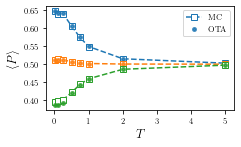

In [29]:
latexify.latexify(columns=2)
def activation_vs_T(gamma,Ts):
    folder = "gamma_G_"+str(gamma)
    symmetric = []
    asymmetric = []
    antisymmetric =[]
    for T in Ts:
        dic = load_obj(folder,T,'symmetric')
        trj = dic['trj']
        sim = dic['sim']
        sim = sim.mean(axis = 0)
        symmetric +=[(sim.mean(),trj[-1].mean())]
        
        dic = load_obj(folder,T,'asymmetric')
        trj = dic['trj']
        sim = dic['sim']
        sim = sim.mean(axis = 0)
        asymmetric +=[(sim.mean(),trj[-1].mean())]
        dic = load_obj(folder,T,'antisymmetric')
        trj = dic['trj']
        sim = dic['sim']
        sim = sim.mean(axis = 0)
        antisymmetric +=[(sim.mean(),trj[-1].mean())]
    return symmetric, asymmetric,antisymmetric
symmetric, asymmetric,antisymmetric = activation_vs_T(3,Ts)
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
for count, data in enumerate([symmetric, asymmetric,antisymmetric]):
    sim,cav = zip(*data)
    plt.plot(Ts,sim,'--s',color = colors[count],mfc = 'w',ms = 6)
    plt.plot(Ts,cav,'o',color = colors[count],ms = 3,mew = 2,alpha = 0.8)
plt.legend(['MC','OTA'])
plt.xlabel('$T$',fontsize = 13)
plt.ylabel('$\langle P \\rangle$',fontsize = 13)
plt.tight_layout()
#plt.savefig('comparison_mean.pdf')
#plt.plot(Ts[0],prova(Ts)[0],'*',c = 'b')
#plt.plot(Ts[0],prova2(Ts)[0],'*',c = 'm')


In [30]:
def prova(T):
    T = np.array(T)
    return 1/(2-np.tanh(1/(2*T))**2/2)
def prova2(T):
    T = np.array(T)
    return 1/(2+np.tanh(1/(2*T))**2/2)

In [31]:
folder = "gamma_G_3"
T = .5
filenames=os.listdir(folder+"/T_"+str(T)+"/data/")

pattern = re.compile("dic-")
dictnames=[name  for name in filenames if pattern.match(name)]# select only dictionary files
dictnames

['dic-asymmetric.pkl', 'dic-antisymmetric.pkl', 'dic-symmetric.pkl']

### Fig. 11

In [32]:
def mapper(kind):
    if kind=='asymmetric':
        return 'uncorrelated'
    else:
        return kind


0.5
0.5
0.5


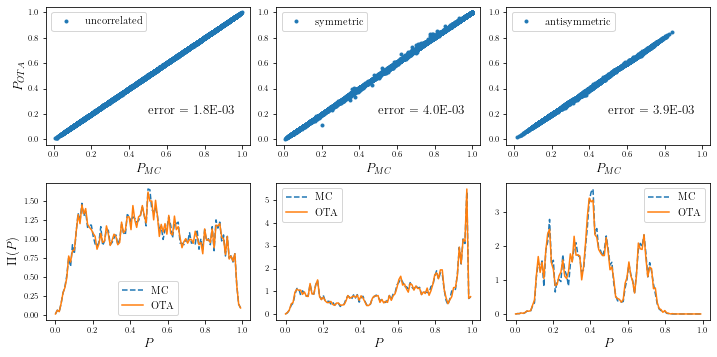

In [33]:
from decimal import Decimal
def load_plot(T,folder = "gamma_G_3"):
    f, axs = plt.subplots(2, 3,figsize = (10,5))
    
    for count,kind in enumerate(['asymmetric','symmetric','antisymmetric']):
        
        dic = load_obj(folder,T,kind)
        trj = dic['trj']
        sim = dic['sim']
        sim = sim.mean(axis = 0)
        err = np.sqrt(np.mean((sim-trj[-1])**2))
        axs[0,count].plot(sim,trj[-1],'.',label = mapper(kind))
        axs[0,count].set_xlabel('$P_{MC}$',fontsize = 13)
        axs[0,0].set_ylabel('$P_{OTA}$',fontsize = 13)
        axs[0,count].text(0.5,0.2,'error = %.1E' % Decimal(err),fontsize = 13)
        #plt.title(kind,fontsize = 13)
        axs[0,count].set_xlim(-0.04,1.04)
        axs[0,count].set_ylim(-0.04,1.04)
        axs[0,count].legend(fontsize = 10.5,numpoints = 1,loc = 'upper left')
        plt.tight_layout()
        #plt.savefig('comparison_points_'+kind+'.pdf')
        #plt.figure()
        #_ = plt.hist(sim-trj[-1],100)

        h,b = np.histogram(sim,bins = np.linspace(0,1,100),density=True)
        axs[1,count].plot(b[:-1],h,ls = '--',label = 'MC')
        h,_ = np.histogram(trj[-1],b,density=True)
        axs[1,count].plot(b[:-1],h,label = 'OTA')
        axs[1,count].legend(fontsize = 10.5)
        axs[1,count].set_xlabel('$P$',fontsize = 13)
        axs[1,0].set_ylabel('$\\Pi(P)$',fontsize = 13)
        plt.tight_layout()
        #plt.savefig('comparison_distr_'+kind+'.pdf')
        print(dic['T'])
load_plot(T)
#plt.savefig('comparison_distr_'+str(T)+'.pdf')


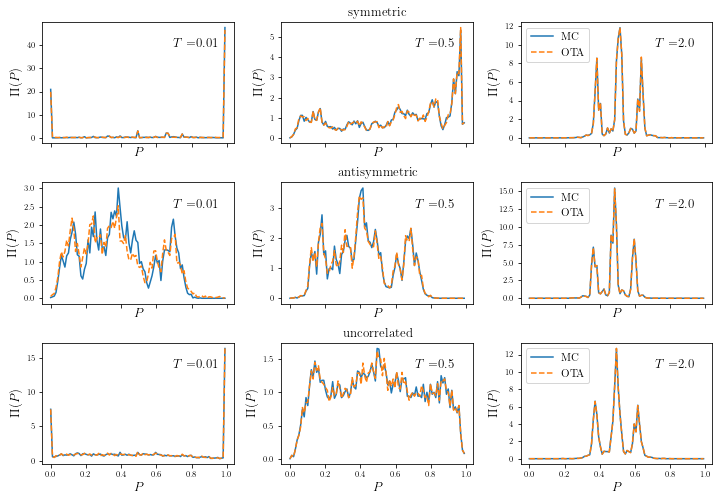

In [34]:


f, axs = plt.subplots(3, 3,figsize = (10,7),sharex = True)
for count,kind in enumerate(['symmetric','antisymmetric','asymmetric']):
    for ind,T in enumerate([0.01,0.5,2.]):
        dic = load_obj(folder,T,kind)
        trj = dic['trj']
        sim = dic['sim']
        sim = sim.mean(axis = 0)
        err = np.sqrt(np.mean(sim-trj[-1])**2)
        h,b = np.histogram(sim,bins = np.linspace(0,1,100),density=True)
        axs[count,ind].plot(b[:-1],h,ls = '-',label = 'MC')
        h,_ = np.histogram(trj[-1],b,density=True)
        axs[count,ind].plot(b[:-1],h,ls = '--',label = 'OTA')
        #plt.legend(fontsize = 10.5)
        axs[count,ind].set_xlabel('$P$',fontsize = 13)
        axs[count,ind].set_ylabel('$\\Pi(P)$',fontsize = 13)
        axs[count,ind].text(0.8,0.82,'$T=$'+str(T),fontsize = 13,horizontalalignment='center', verticalalignment='center',transform = axs[count,ind].transAxes)
    axs[count,1].set_title(mapper(kind),fontsize = 13)
    axs[count,2].legend(fontsize = 11,numpoints = 1,ncol = 1,loc = 'upper left')
plt.tight_layout()
#plt.savefig('./figures/all_hist.pdf')

### Convergence of OTA for  antisymmetric matrix

[]

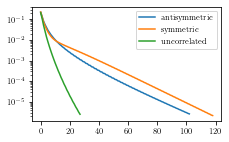

In [24]:
folder = "gamma_G_3"
T = .5
dic = load_obj(folder,T,'antisymmetric')
trj = dic['trj']
sim = dic['sim']
#plt.ylim(1e-5,1e-4)
#plt.xlim(60,80)
J = dic['J']
sorted(Ts)
plt.plot(np.sqrt(np.mean(np.diff(np.array(trj),axis = 0)**2,axis = 1)),label ='antisymmetric')
dic = load_obj(folder,T,'symmetric')
trj = dic['trj']
sim = dic['sim']
J = dic['J']
plt.plot(np.sqrt(np.mean(np.diff(np.array(trj),axis = 0)**2,axis = 1)),label ='symmetric')
dic = load_obj(folder,T,'asymmetric')
trj = dic['trj']
sim = dic['sim']
J = dic['J']
plt.plot(np.sqrt(np.mean(np.diff(np.array(trj),axis = 0)**2,axis = 1)),label ='uncorrelated')

plt.legend()
plt.semilogy()


#plt.savefig('convergence_OTA.pdf')

### Comparison with equilibrium

In [9]:
folder = "gamma_G_3"
T = .5
dic = load_obj(folder,T,'symmetric')
trj = dic['trj']
sim = dic['sim']
J = dic['J']

In [32]:
def equilibrium_prob(J,T,N_iterations = 50):
    '''
    Input should be a sparse matrix  '''
    J = scipy.sparse.csc_matrix(J)
    def update_equilibrium(P,inter,T):
        numerator = np.prod(1+P*(np.exp(inter/T)-1))#boltzman factor
        return numerator/(numerator+1)#to ensure normalisation
    J_transpose = J.transpose()
    js = J_transpose.tolil().rows
    interaction = J_transpose.tolil().data
    N = J.shape[0]
    P_A =J.copy()
    P_A.data =np.random.rand(J.nnz)#prob of node activation
    row = J.tocoo().row#link to 
    col = J.tocoo().col#link from

    for t in range(N_iterations):
        P_old = P_A.copy()
        for i,l in zip(row,col):
            cond = (np.array(js[i])!=l)#this is for cavity probabilities,# predecessors. of i /{l}
            cav_neigh = np.array(js[i])[cond]   
            P_A[i,l] = update_equilibrium(P_A[cav_neigh,i].toarray().squeeze(),inter = np.array(interaction[i])[cond],T = T)
        improvement = abs(P_A-P_old).max()
        if improvement<1e-4:
            print('ending after ',t,' iterations')
            break
    P_eq = np.zeros(N)
    for i in range(N):
        cond = np.array([True]*len(js[i]))
        cav_neigh = np.array(js[i])[cond]   
        P_eq[i] = update_equilibrium(P_A[cav_neigh,i].toarray().squeeze(),inter = np.array(interaction[i])[cond],T = T)
    return P_eq
%time P_eq = equilibrium_prob(J,T,N_iterations = 50)

ending after  9  iterations
CPU times: user 58.2 s, sys: 14.6 ms, total: 58.3 s
Wall time: 58.3 s


Text(0, 0.5, 'density')

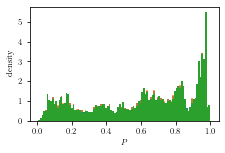

In [33]:
_ = plt.hist(P_eq,100,density=True)
_ = plt.hist(sim.mean(axis = 0),100,alpha = 0.7,density=True)
_ = plt.hist(dic['trj'][-1],100,density=True)
plt.xlabel('$P$')
plt.ylabel('density')

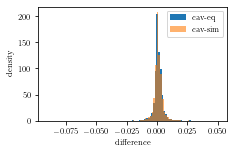

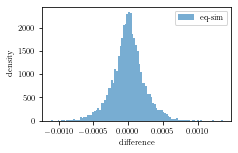

In [34]:
plt.hist(dic['trj'][-1]-P_eq,100,label = 'cav-eq',density=True)
plt.hist(dic['trj'][-1]-sim.mean(axis = 0),100,alpha = 0.6,label = 'cav-sim',density=True)
plt.xlabel('difference')
plt.ylabel('density')
plt.legend()
plt.figure()
_ = plt.hist(P_eq-sim.mean(axis = 0),100,alpha = 0.6,density=True,label = 'eq-sim')
plt.xlabel('difference')
plt.ylabel('density')
plt.legend()
